In [1238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [1239]:
df= pd.read_csv('../data/market_integrates_400.csv')




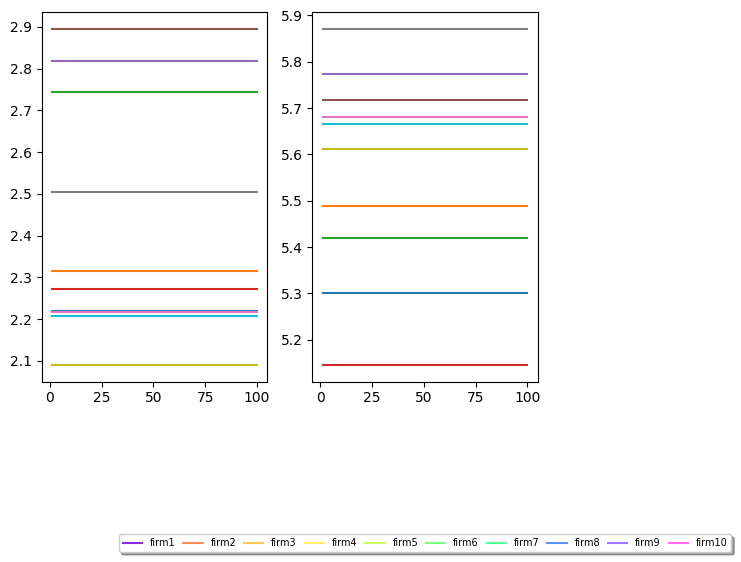

In [1240]:
fig, (ax1, ax2) = plt.subplots(1, 2)

for firm in df['firm_ids'].unique():
    df_firm = df[df['firm_ids'] == firm]
    ax1.plot(df_firm.market_ids, df_firm.characteristic1)
    ax2.plot(df_firm.market_ids, df_firm.characteristic2)

# Creating the legend
legend_labels = ['firm1', 'firm2', 'firm3', 'firm4', 'firm5', 'firm6', 'firm7', 'firm8', 'firm9', 'firm10']
plt.legend(lines, legend_labels,
           fontsize='7',
           loc="upper center",
           bbox_to_anchor=(0.5, -0.4),
           fancybox=True, 
           shadow=True, 
           ncol=10,
           columnspacing=0.8
)

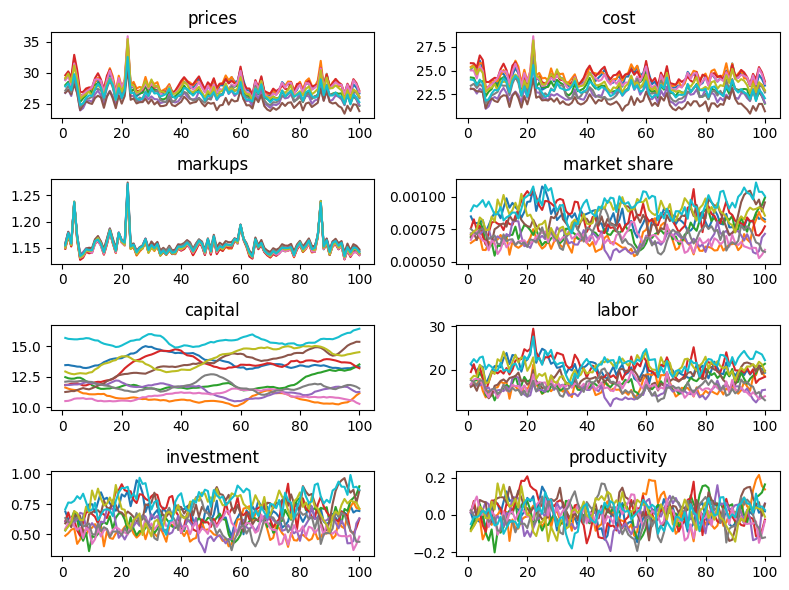

In [1241]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]] = plt.subplots(4, 2, figsize=(8,6))

for firm in df['firm_ids'].unique():
    df_firm = df[df['firm_ids'] == firm]
    ax1.plot(df_firm.market_ids, df_firm.prices)
    ax2.plot(df_firm.market_ids, df_firm.marginal_cost)
    ax3.plot(df_firm.market_ids, df_firm.markups)
    ax4.plot(df_firm.market_ids, df_firm.shares)
    ax5.plot(df_firm.market_ids, df_firm.capital)
    ax6.plot(df_firm.market_ids, df_firm.labor)
    ax7.plot(df_firm.market_ids, df_firm.investment)
    ax8.plot(df_firm.market_ids, df_firm.productivity)


ax1.set_title('prices')
ax2.set_title('cost')
ax3.set_title('markups')
ax4.set_title('market share')
ax5.set_title('capital')
ax6.set_title('labor')
ax7.set_title('investment')
ax8.set_title('productivity')

plt.tight_layout()
plt.show()

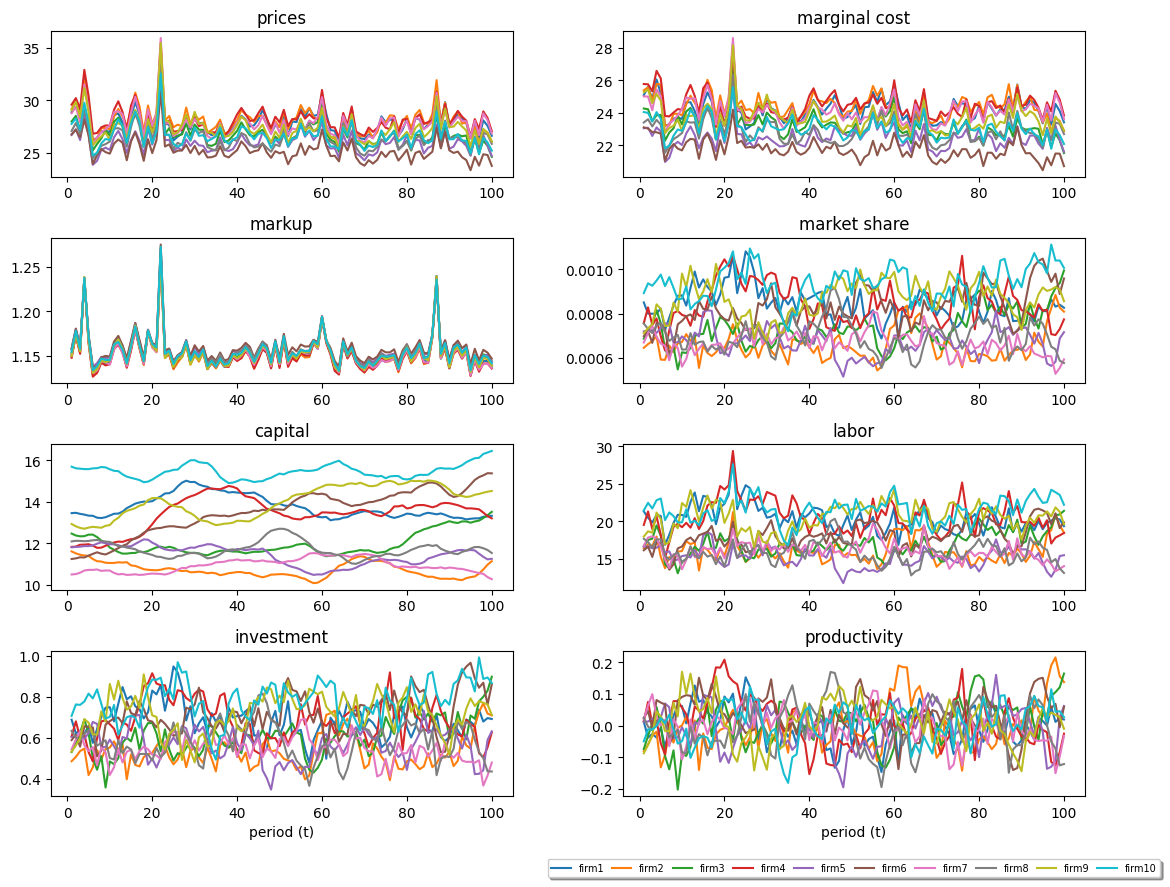

In [1242]:
import matplotlib.pyplot as plt

fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]] = plt.subplots(4, 2, figsize=(12,9))

lines = []  # To store the lines for the legend

for firm in df['firm_ids'].unique():
    df_firm = df[df['firm_ids'] == firm]
    line1, = ax1.plot(df_firm.market_ids, df_firm.prices)
    line2, = ax2.plot(df_firm.market_ids, df_firm.marginal_cost)
    line3, = ax3.plot(df_firm.market_ids, df_firm.markups)
    line4, = ax4.plot(df_firm.market_ids, df_firm.shares)
    line5, = ax5.plot(df_firm.market_ids, df_firm.capital)
    line6, = ax6.plot(df_firm.market_ids, df_firm.labor)
    line7, = ax7.plot(df_firm.market_ids, df_firm.investment)
    line8, = ax8.plot(df_firm.market_ids, df_firm.productivity)
    
    lines.append(line1)  # Add the line to the legend list


ax1.set_title('prices')
ax2.set_title('marginal cost')
ax3.set_title('markup')
ax4.set_title('market share')
ax5.set_title('capital')
ax6.set_title('labor')
ax7.set_title('investment')
ax7.set_xlabel('period (t)')

ax8.set_title('productivity')
ax8.set_xlabel('period (t)')



# Creating the legend
legend_labels = ['firm1', 'firm2', 'firm3', 'firm4', 'firm5', 'firm6', 'firm7', 'firm8', 'firm9', 'firm10']
plt.legend(lines, legend_labels,
           fontsize='7',
           loc="upper center",
           bbox_to_anchor=(0.5, -0.4),
           fancybox=True, 
           shadow=True, 
           ncol=10,
           columnspacing=0.8
)
                                    
plt.tight_layout()
plt.savefig('model_over_time.pdf')
plt.show()


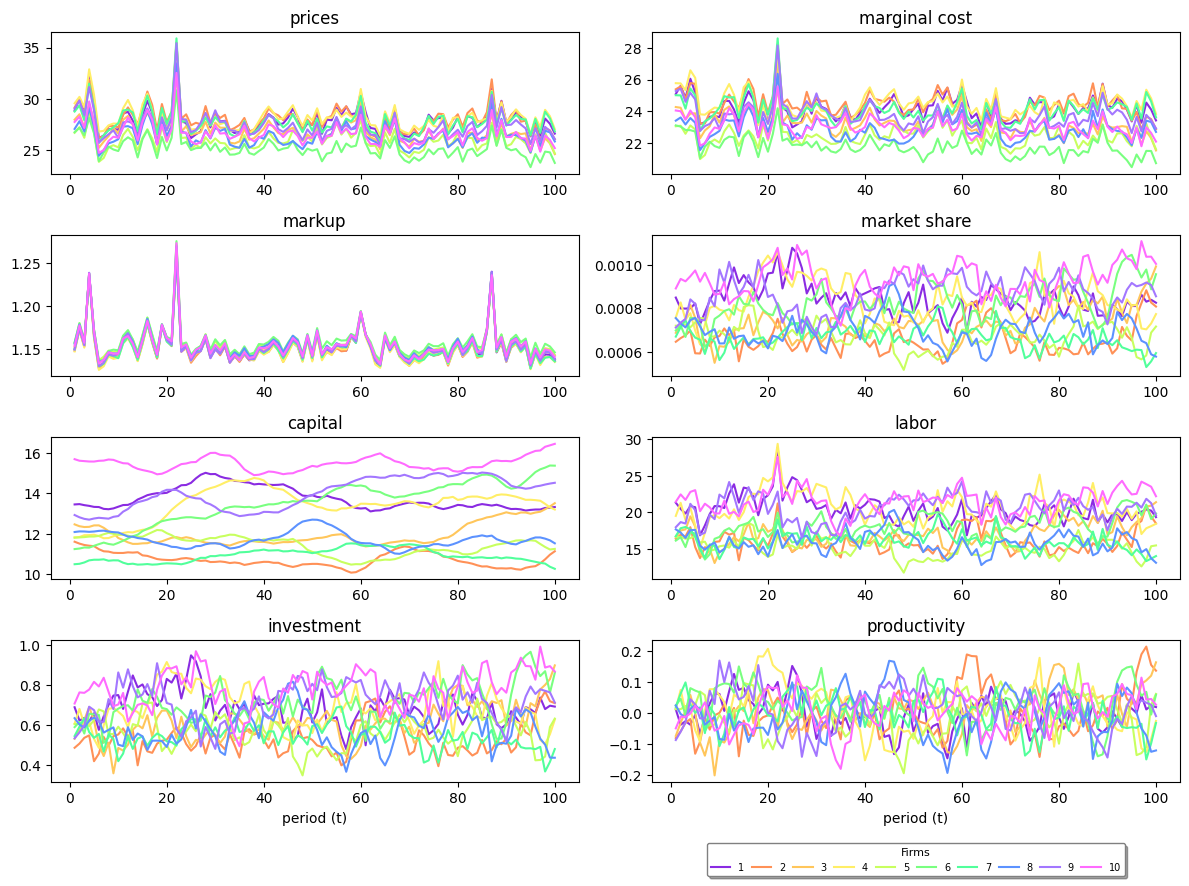

In [1243]:
import matplotlib.pyplot as plt
import random

fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6], [ax7, ax8]] = plt.subplots(4, 2, figsize=(12, 9))

colors = ["#8A2BE2", "#FF9157", "#FFC65B", "#FFEE66", "#C8FF5F", "#79FF80", "#51FF9B", "#5C92FF", "#A377FF", "#FF6BFF"]
lines = []  # To store the lines for the legend

for i, firm in enumerate(df['firm_ids'].unique()):
    df_firm = df[df['firm_ids'] == firm]
    line1, = ax1.plot(df_firm.market_ids, df_firm.prices, color=colors[i])
    line2, = ax2.plot(df_firm.market_ids, df_firm.marginal_cost, color=colors[i])
    line3, = ax3.plot(df_firm.market_ids, df_firm.markups, color=colors[i])
    line4, = ax4.plot(df_firm.market_ids, df_firm.shares, color=colors[i])
    line5, = ax5.plot(df_firm.market_ids, df_firm.capital, color=colors[i])
    line6, = ax6.plot(df_firm.market_ids, df_firm.labor, color=colors[i])
    line7, = ax7.plot(df_firm.market_ids, df_firm.investment, color=colors[i])
    line8, = ax8.plot(df_firm.market_ids, df_firm.productivity, color=colors[i])
    
    lines.append(line1)  # Add the line to the legend list

ax1.set_title('prices')
ax2.set_title('marginal cost')
ax3.set_title('markup')
ax4.set_title('market share')
ax5.set_title('capital')
ax6.set_title('labor')
ax7.set_title('investment')
ax7.set_xlabel('period (t)')

ax8.set_title('productivity')
ax8.set_xlabel('period (t)')

# Creating the legend
legend_labels = df['firm_ids'].unique()
random.shuffle(colors)  # Randomize the order of colors for the legend
plt.legend(lines, legend_labels,
           fontsize='7',
           loc="upper center",
           bbox_to_anchor=(0.5, -0.4),
           fancybox=True,
           shadow=True,
           ncol=10,
           columnspacing=0.8,
           facecolor='white',
           edgecolor='gray',
           title="Firms",
           title_fontsize='8',
           labelspacing=0.5
)

plt.tight_layout()
plt.savefig('model_over_time.pdf')
plt.show()

In [1244]:
# df_cc = pd.read_csv('../data/market_constant_cost100.csv')
df_grouped_cc = df.groupby('firm_ids')
# Look at the firm with bad product charactristics
group1_cc = df_grouped_cc.get_group(2)
# Look at a firm with good product characteristics
group4_cc = df_grouped_cc.get_group(4)




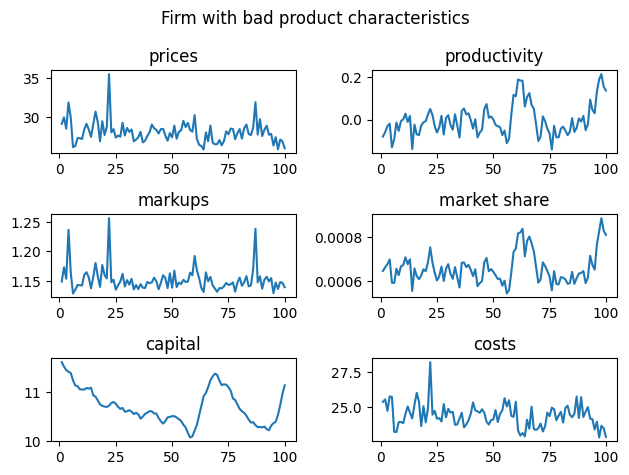

In [1245]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2)
fig.suptitle(f'Firm with bad product characteristics')

ax1.plot(group1_cc.market_ids, group1_cc.prices)
ax2.plot(group1_cc.market_ids, group1_cc.productivity)
ax3.plot(group1_cc.market_ids, group1_cc.markups)
ax4.plot(group1_cc.market_ids, group1_cc.shares)
ax5.plot(group1_cc.market_ids, group1_cc.capital)
ax6.plot(group1_cc.market_ids, group1_cc.marginal_cost)

ax1.set_title('prices')
ax2.set_title('productivity')
ax3.set_title('markups')
ax4.set_title('market share')
ax5.set_title('capital')
ax6.set_title('costs')

plt.tight_layout()
plt.show()


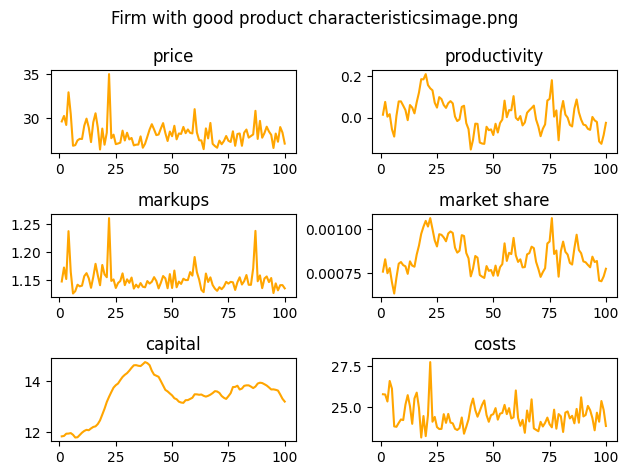

In [1246]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2)
fig.suptitle(f'Firm with good product characteristicsimage.png')

ax1.plot(group4_cc.market_ids, group4_cc.prices, color='orange')
ax2.plot(group4_cc.market_ids, group4_cc.productivity, color='orange')
ax3.plot(group4_cc.market_ids, group4_cc.markups, color='orange')
ax4.plot(group4_cc.market_ids, group4_cc.shares, color='orange')
ax5.plot(group4_cc.market_ids, group4_cc.capital, color='orange')
ax6.plot(group4_cc.market_ids, group4_cc.marginal_cost, color='orange')

ax1.set_title('price')
ax2.set_title('productivity')
ax3.set_title('markups')
ax4.set_title('market share')
ax5.set_title('capital')
ax6.set_title('costs')

plt.tight_layout()
plt.show()

In [1247]:
print(df)

     market_ids  firm_ids  characteristic1  characteristic2  prices  \
0             1         1           2.2194           5.2999 28.8678   
1             1         2           2.3150           5.4882 29.1571   
2             1         3           2.7436           5.4186 27.9804   
3             1         4           2.2714           5.1457 29.5764   
4             1         5           2.8184           5.7733 26.7011   
..          ...       ...              ...              ...     ...   
995         100         6           2.8955           5.7177 23.7698   
996         100         7           2.2173           5.6803 26.8375   
997         100         8           2.5046           5.8713 25.8578   
998         100         9           2.0908           5.6120 26.1016   
999         100        10           2.2080           5.6658 25.2158   

     marginal_cost  shares  profits  markups  e_quantity  capital  investment  \
0          25.0911  0.0008   0.0032   1.1505     42.4972  13.4558 

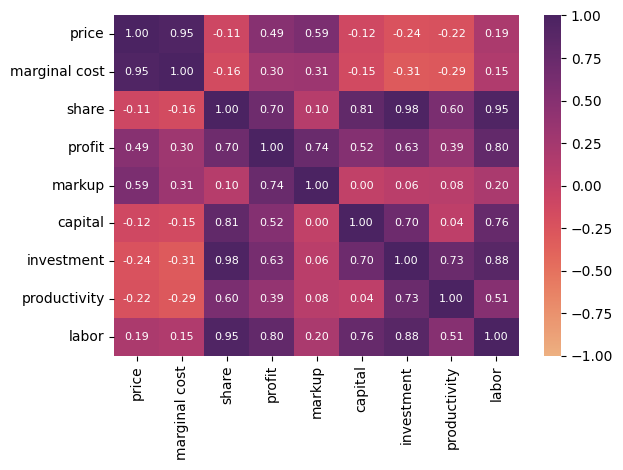

In [1248]:
# heatmap_df = df.drop(['market_ids','firm_ids', 'characteristic1', 'characteristic2', 'e_quantity'], axis=1)
heatmap_df = df.drop(['market_ids','firm_ids', 'e_quantity', 'characteristic1', 'characteristic2', 'indirect_util'], axis=1)
labels = ['price', 'marginal cost', 'share', 'profit', 'markup', 'capital', 'investment', 'productivity', 'labor']
fig = sns.heatmap(heatmap_df.corr(), xticklabels=labels, yticklabels=labels,
                   vmin=-1., vmax=1., cmap="flare",
                     annot=True, fmt='.2f', annot_kws={"size":8})
plt.tight_layout() 
plt.savefig('correlation_map_model.pdf')

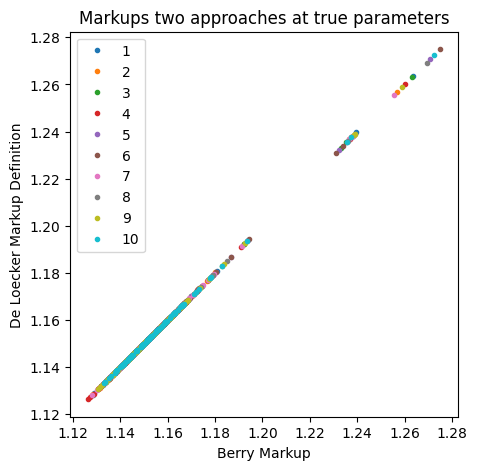

In [1249]:
# markups_deloecker = (0.3**2)*(df.prices*(df.e_quantity/(np.exp(1+df.productivity)*df.capital**0.7)))/((0.5**2)*df.labor)
# markup_hall = (df.e_quantity/0.3*df.labor)
markups_deloecker = (0.3*df.prices*df.e_quantity)/(15*df.labor)
df['markups_deloecker'] = markups_deloecker

x45 = [0.5, 3.5]
y45 = [0.5, 3.5]


groups = df.groupby('firm_ids')

# Plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.markups, group.markups_deloecker, marker='o', linestyle='', ms=3, label=name)
ax.legend()
# plt.plot(x45, y45)
plt.title("Markups two approaches at true parameters")
plt.xlabel("Berry Markup")
plt.ylabel("De Loecker Markup Definition")
plt.show()


# plt.scatter(df.markups, markups_deloecker, color='pink')
# # plt.scatter(df.markups, markups_hall)
# plt.show()

In [1250]:
# Create an empty string to store the LaTeX table content
pd.set_option('display.float_format', lambda x: '%.4f' % x)

latex_tables = ''

for firm in df['firm_ids'].unique():
    df_firm = df[df['firm_ids'] == firm]
    df_firm_drop = df_firm.drop(['market_ids','firm_ids', 'e_quantity', 'indirect_util', 'markups_deloecker'], axis=1)
    
    # Compute summary statistics per firm
    df_sum_stats = df_firm_drop.describe().loc[['mean', 'std', 'min', 'max']]
    
    # Convert summary statistics DataFrame to LaTeX table format
    latex_table = df_sum_stats.to_latex()

    # Add the firm's table to the overall LaTeX content
    latex_tables += f' \subsubsection*{{Firm {firm}}}\n'
    latex_tables += latex_table + '\n\n'

# Save the overall LaTeX content to a single file
with open('summary_tables.tex', 'w') as f:
    f.write(latex_tables)

/var/folders/ry/znvcg3w50vl64dd0_cjzk_kh0000gn/T/ipykernel_8649/1485456289.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df_sum_stats.to_latex()
/var/folders/ry/znvcg3w50vl64dd0_cjzk_kh0000gn/T/ipykernel_8649/1485456289.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df_sum_stats.to_latex()
/var/folders/ry/znvcg3w50vl64dd0_cjzk_kh0000gn/T/ipykernel_8649/1485456289.py:14: FutureWarning: In future versions `DataFrame.to_latex` is expect

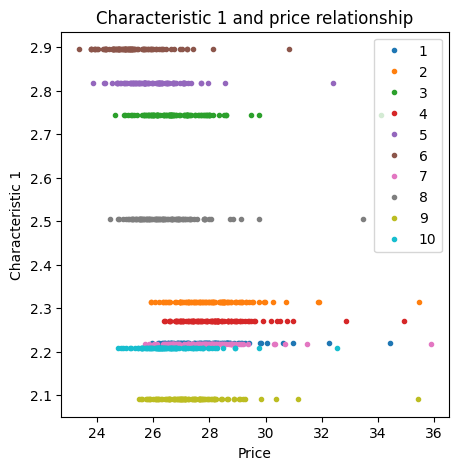

In [1251]:
groups = df.groupby('firm_ids')

# Plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.prices, group.characteristic1, marker='o', linestyle='', ms=3, label=name)
ax.legend()
# plt.plot(x45, y45)
plt.title("Characteristic 1 and price relationship")
plt.xlabel("Price")
plt.ylabel("Characteristic 1")
plt.show()


# plt.scatter(df.markups, markups_deloecker, color='pink')
# # plt.scatter(df.markups, markups_hall)
plt.show()

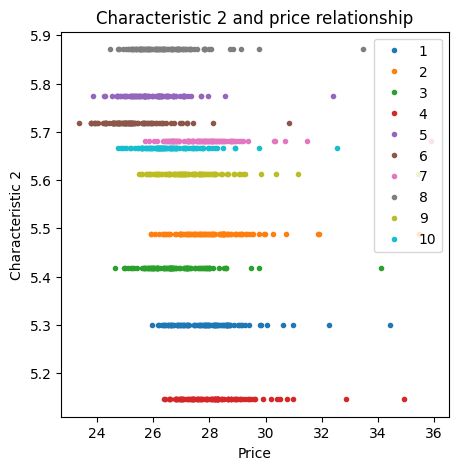

In [1252]:

groups = df.groupby('firm_ids')

# Plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.prices, group.characteristic2, marker='o', linestyle='', ms=3, label=name)
ax.legend()
# plt.plot(x45, y45)
plt.title("Characteristic 2 and price relationship")
plt.xlabel("Price")
plt.ylabel("Characteristic 2")
plt.show()


# plt.scatter(df.markups, markups_deloecker, color='pink')
# # plt.scatter(df.markups, markups_hall)
plt.show()

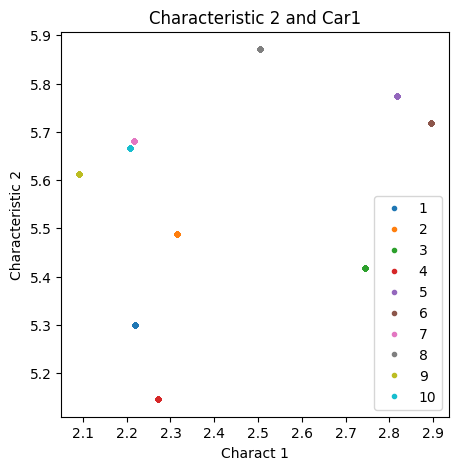

In [1253]:
roups = df.groupby('firm_ids')

# Plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.characteristic1, group.characteristic2, marker='o', linestyle='', ms=3, label=name)
ax.legend()
# plt.plot(x45, y45)
plt.title("Characteristic 2 and Car1")
plt.xlabel("Charact 1")
plt.ylabel("Characteristic 2")
plt.show()


# plt.scatter(df.markups, markups_deloecker, color='pink')
# # plt.scatter(df.markups, markups_hall)
plt.show()